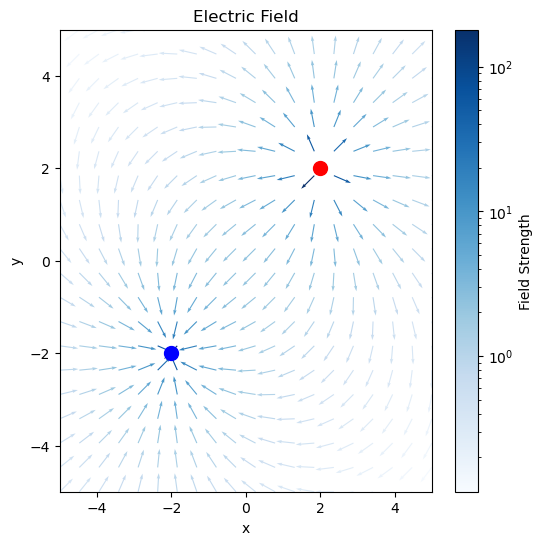

In [1]:
%display latex

import numpy as np
import matplotlib.pyplot as plt

def electric_field(x, y, charges):
    """
    Docstring goes here
    """
    Ex, Ey = np.zeros_like(x), np.zeros_like(y)
    k = 8.99e9  # Coulomb's constant in N·m²/C²

    for (xq, yq, q) in charges:
        dx, dy = x - xq, y - yq
        r = np.linalg.norm([dx, dy], axis=0)
        r3 = r**3
        Ex += k * q * dx / r3
        Ey += k * q * dy / r3

    return Ex, Ey


def plot_field(charges, grid_size=20, normalize=True):
    x = np.linspace(-5, 5, grid_size)
    y = np.linspace(-5, 5, grid_size)
    X, Y = np.meshgrid(x, y)

    Ex, Ey = electric_field(X, Y, charges)
    magnitude = np.sqrt(Ex**2 + Ey**2)

    if normalize:
        Ex /= magnitude
        Ey /= magnitude

    plt.figure(figsize=(6, 6))
    plt.quiver(X, Y, Ex, Ey, magnitude, cmap='Blues', scale=20, norm='log')
    plt.colorbar(label='Field Strength')

    for (xq, yq, q) in charges:
        plt.scatter(xq, yq, c='red' if q > 0 else 'blue', s=100)

    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Electric Field')
    plt.show()

# Example charges: (x, y, charge)
charges = [(2, 2, 1e-9), (-2, -2, -1e-9)]
plot_field(charges)


In [43]:
%display latex
from sage import all
import numpy as np

from functools import reduce

# Cartesian coordinates
x,y,z = var('x y z')

# displacement vectors
u, v = var('u v')

ε_0 = 8.85e-12              # 8.8541878188e-12
𝛋 = 1. / (4 * np.pi * ε_0)  # Coulomb's constant in N·m²/C²
dq = 1

chrgs = [
    (0,0,0),
    (1,0,0),
    (0,1,0),
    (1,1,0)
]

#_E(x,y,z) = ( (𝛋 * 1.) / (( vector([x,y,z]) ).norm())^2) * ((1. / ( vector([x,y,z]) ).norm()) * ( vector([x,y,z]) ) )

#E(x,y,z) = reduce(
    #lambda a,b: simplify(a+b),
    #[
        #_E(vector([x,y,z]), vector([1, 2, 3]))
    #]
#)

E = lambda x, y, z: reduce(
    lambda a,b: simplify(a+b),
    [ 
        (vector([x,y,z]) - vector([dq_x, dq_y, dq_z]) ).norm() for (dq_x, dq_y, dq_z) in chrgs 
    ]
)

p = plot_vector_field3d(
    ( 
        E,
        y, 
        z
    ),
    (x,-2,2), (y,-2,2), (z,-2,2), 
    center_arrows=True
)
show(p)


Graphics3d Object